In [137]:
# 금일 수업은 Precision, Recall, F1 score (TP, FP, FN, TN) 에 대해 이론 수업 2시간 진행 함
# 아래 블로그 링크에서 이론 내용 확인 후 아래 코드 작성 하시면 됩니다
#  https://89douner.tistory.com/174


In [138]:
target     = [1, 0, 0, 1, 1,
              1, 0, 1, 1, 1]
prediction = [0, 1, 1, 1, 1,
              0, 1, 0, 1, 0]

In [139]:
# TP (Target = 1, Prediction = 1)
# TN (Target = 0, Prediction = 0)
# FP (Target = 0, Prediction = 1) -> Type 1 Error
# FN (Target = 1, Prediction = 0) -> Type 2 Error

t_p = t_n = f_p = f_n = 0
for i in range(len(prediction)):
    
    # TP
    if target[i] == 1 and prediction[i] == 1 :
        t_p += 1
    
    # TN
    if target[i] == 0 and prediction[i] == 0 :
        t_n += 1
    
    # FP
    if target[i] == 0 and prediction[i] == 1 :
        f_p += 1

    # FN
    if target[i] == 1 and prediction[i] == 0 :
        f_n += 1

In [18]:
print (t_p , t_n , f_p , f_n)

3 0 3 4


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

print (confusion_matrix(target, prediction))
print ('*'*30)
print (accuracy_score(target, prediction))
print (recall_score(target, prediction))
print (precision_score(target, prediction))
print (f1_score(target, prediction))

[[0 3]
 [4 3]]
******************************
0.3
0.42857142857142855
0.5
0.4615384615384615


In [25]:
이진 분류표
불량품을 찾는게 목적

제품에 대한 품질 테스트 결과 양성 -> 불량품
                             음성 -> 정상

        불량   정상
불량     TP     FN
정상     FP     TN

FP  = 정상제품을 불량으로 판단

암(cancer) - 양성 (P), 음성(N)


       예측 암   예측 암x
암       TP        FN
암 x     FP        TN


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 7)

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

ary = [[9,1,0,0],
      [1,15,3,1],
      [5,0,24,1],
      [0,4,1,15]]

aryDF = pd.DataFrame(ary,
                    index   = [i for i in 'ABCD'],
                    columns = [i for i in 'ABCD'])
aryDF

,A,B,C,D
A,9,1,0,0
B,1,15,3,1
C,5,0,24,1
D,0,4,1,15


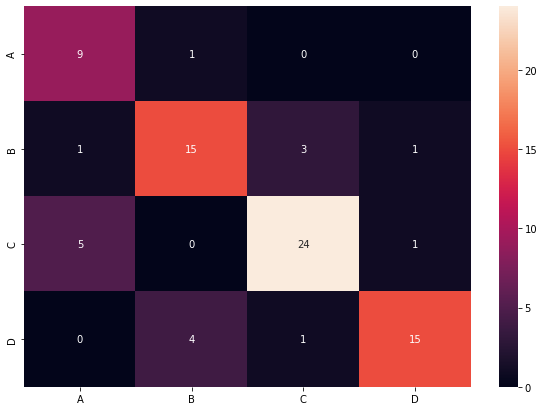

In [37]:
plt.figure(figsize=(10,7))

sns.heatmap(aryDF, annot=True)

plt.show()
plt.close()

In [40]:
total = np.sum(ary, axis = 1)

ary = ary / total [ :  None]
ary

array([[0.9       , 0.05      , 0.        , 0.        ],
       [0.1       , 0.75      , 0.1       , 0.05      ],
       [0.5       , 0.        , 0.8       , 0.05      ],
       [0.        , 0.2       , 0.03333333, 0.75      ]])

In [41]:
aryDF = pd.DataFrame(ary,
                    index   = [i for i in 'ABCD'],
                    columns = [i for i in 'ABCD'])
aryDF

,A,B,C,D
A,0.9,0.05,0.000000,0.00
B,0.1,0.75,0.100000,0.05
C,0.5,0.00,0.800000,0.05
D,0.0,0.20,0.033333,0.75


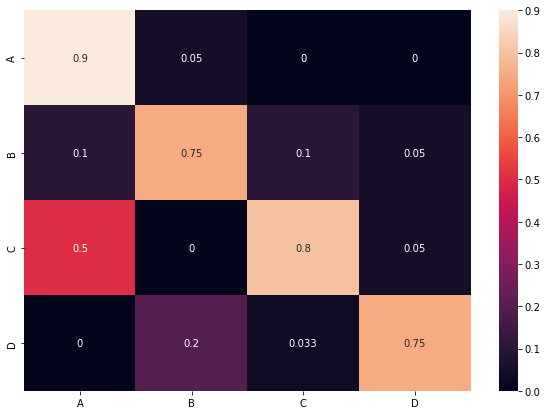

In [43]:
plt.figure(figsize=(10,7))

sns.heatmap(aryDF, annot=True)

plt.show()
plt.close()

In [73]:
titanic = pd.read_csv('./data/titanic_train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [74]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 정확도 문제점 : 이진 분류의 경우 데이터의 구성에 따라서 모델의 성능을 왜곡 할 수 있다.

In [97]:
from sklearn.base import BaseEstimator

class UserClassifier (BaseEstimator):
    
    def fit(self, x, y =None):
        pass
    
    # 성별이 1 이면 0, 아니면 1 예측
    def predict(self, x) :
        for idx in range(X_test.shape[0]) :
            # print (X_test ['Sex'].iloc[idx])
            if X_test['Sex'].iloc[idx] == 1 :
                pred[idx] = 0
            else : 
                pred[idx] = 1
        return pred

In [98]:
titanic_label = titanic['Survived']
titanic_data  = titanic.drop(['Survived'], axis =1)

In [99]:
titanic_label

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [100]:
titanic_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [102]:
from sklearn.preprocessing import LabelEncoder

In [103]:
# 레일블 인코딩 Cabin , Sex , Embarked
def drop_features(frm):
    frm.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return frm


def pre_processing(frm):
    frm['Age'].fillna(frm['Age'].mean(), inplace=True)
    frm['Cabin'].fillna('N', inplace=True)
    frm['Embarked'].fillna('N', inplace=True)
    return frm


def label_encoder(frm):
    frm['Cabin'] = frm['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        encoder = LabelEncoder()
        encoder.fit(frm[feature])
        frm[feature] = encoder.transform(frm[feature])
    return  frm

def transform_features(frm):
    frm = drop_features(frm)
    frm = pre_processing(frm)
    frm = label_encoder(frm)
    return frm


In [104]:
titanic_data_feature = transform_features(titanic_data)
titanic_data_feature

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [105]:
titanic_data_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    int32  
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(3), int64(3)
memory usage: 45.4 KB


In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(titanic_data_feature,
                                                   titanic_label,
                                                   test_size = .2,
                                                   random_state = 10)

In [108]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [109]:
user_model = UserClassifier ()
user_model.fit(X_train, y_train)

y_pred = user_model.predict(X_test)
print ('accuracy {}'.format (accuracy_score(y_test, y_pred)))

accuracy 0.8212290502793296


In [111]:
def metrics_evaluation(y_test, y_pred):
    print("정확도 : {}, 정밀도 : {}, 재현율 : {}, F1 : {}"
         .format(accuracy_score(y_test, y_pred),
                 precision_score(y_test, y_pred),
                 recall_score(y_test, y_pred),
                 f1_score(y_test, y_pred)))

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
logist_model = LogisticRegression()
logist_model.fit (X_train, y_train)
y_pred = logist_model.predict(X_test)

metrics_evaluation(y_test, y_pred)

정확도 : 0.8268156424581006, 정밀도 : 0.746031746031746, 재현율 : 0.7580645161290323, F1 : 0.752


In [120]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer

# 교차검증

fold = KFold(n_splits = 20,
            random_state = 1,
            shuffle = True)

scoring = {
    'accuracy'  : make_scorer(accuracy_score),
    'precision' : make_scorer(precision_score),
    'recall'    : make_scorer(recall_score),
    'f1_score'  : make_scorer(f1_score)
}

result = cross_validate(logist_model, X_train, y_train, cv=fold, scoring = scoring)

In [121]:
result.keys()

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1_score'])

In [123]:
print (result['test_accuracy'].mean())
print (result['test_precision'].mean())
print (result['test_recall'].mean())
print (result['test_f1_score'].mean())

0.790873015873016
0.7559356250474671
0.6917543567543568
0.7152029427212


In [134]:
# [실습] - load_breast_cancer()
# 유방암 관련 데이터 - 양성을 양성으로 예측한 비율이 높을수록 좋은 성능모형이라 판단할 수 있다.

# model_selection
# pre_processing

# 분류학습기
# LogisticRegression
# RandomForestClassifier

# 성능평가

# 교차검증 cross_validate 후 성능평가

# 교차검증 GridsearchCV   후 성능평가

# 재현율 높게 나온것 ?


In [132]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])